In [1]:
import urllib
from bs4 import BeautifulSoup
import dill as pickle
import sys
%matplotlib inline
sys.setrecursionlimit(100000)

In [2]:
#website = "nips2017"
website = "nips2019"
#website = "icml2017"

In [3]:
if True:
    if website=='nips2017':
        url = "https://nips.cc/Conferences/2017/AcceptedPapersInitial"
    elif website=='icml2017':
        url = "https://2017.icml.cc/Conferences/2017/AcceptedPapers"
    elif website=='nips2019':
        url = "https://nips.cc/Conferences/2019/AcceptedPapersInitial"
    html = urllib.request.urlopen(url)
    soup = BeautifulSoup(html, "lxml")
    with open(website+'.pickle', mode='wb') as f:
        pickle.dump(soup, f)
else:
    with open(website+'.pickle', mode='rb') as f:
        soup = pickle.load(f)

In [4]:
if website=='nips2017' or website=='nips2019':
    titles = soup.find_all('b')
elif website=='icml2017':
    titles = soup.find_all('strong')
else:
    NotImplementedError()
nb_tot_papers = len(titles) - 3
titles

[<b>NeurIPS <span>| 2019 </span></b>,
 <b>   Calls 2019</b>,
 <b>   Author Resources</b>,
 <b>Multimodal Model-Agnostic Meta-Learning via Task-Aware Modulation</b>,
 <b>ViLBERT: Pretraining Task-Agnostic Visiolinguistic Representations for Vision-and-Language Tasks</b>,
 <b>Stochastic Shared Embeddings: Data-driven Regularization of Embedding Layers</b>,
 <b>Unsupervised Scale-consistent Depth and Ego-motion Learning from Monocular Video</b>,
 <b>Zero-shot Learning via Simultaneous Generating and Learning</b>,
 <b>Ask not what AI can do for you, but what AI should do: Towards a framework of task delegability</b>,
 <b>Stand-Alone Self-Attention in Vision Models</b>,
 <b>High Fidelity Video Prediction with Large Neural Nets</b>,
 <b>Unsupervised learning of object structure and dynamics from videos</b>,
 <b>TensorPipe: Easy Scaling with Micro-Batch Pipeline Parallelism</b>,
 <b>Meta-Learning with Implicit Gradients</b>,
 <b>Adversarial Examples Are Not Bugs, They Are Features</b>,
 <b>So

In [5]:
print(nb_tot_papers)

1429


In [6]:
import re

pattern = r'\([\w\s]+\)'
if website=='nips2017' or website=='nips2019':
    authors = soup.find_all('i')
elif website=='icml2017':
    authors = soup.find_all('em')
    
institutes = []
institutes_in_paper = []
for author in authors:
    for content in author.contents:
        items = re.findall(pattern, content)
        [institutes.append(item[1:-1].lower()) for item in items]
        institutes_in_paper.append(items)
#institutes = set(sum(institutes, []))
#institutes = set(institutes)
institutes.sort()
institutes

[' tokyo metropolitan university',
 ' tokyo metropolitan university',
 ' télécom paristech',
 ' télécom paristech',
 '1998',
 'aalto university',
 'aalto university',
 'aalto university',
 'aalto university',
 'aalto university',
 'aalto university',
 'aalto university',
 'aalto university',
 'aalto university',
 'aalto university',
 'aalto university',
 'aalto university',
 'aarhus university',
 'aarhus university',
 'aarhus university',
 'academia sinica',
 'academia sinica',
 'academia sinica',
 'academia sinica',
 'academia sinica',
 'academia sinica',
 'academia sinica',
 'academia sinica',
 'adobe',
 'adobe',
 'adobe research',
 'adobe research',
 'adobe research',
 'adobe research',
 'adobe research',
 'adobe systems incorporated',
 'agh university of science and technology in kraków',
 'ai2',
 'aipg',
 'airbnb',
 'aist',
 'aist',
 'alan turing institute',
 'alan turing institute',
 'alibaba',
 'alibaba',
 'alibaba',
 'alibaba',
 'alibaba',
 'alibaba',
 'alibaba group',
 'alibab

In [7]:
print(set(institutes))

{'hanyang university', 'university of helsinki', 'tsinghua', 'ensea', 'graz university of technology', 'standord', 'university of utah', 'viji', 'barcelona supercomputing center', 'ntt', 'hangzhou dianzi university', 'lg electronics', 'samsung ai center cambridge', 'jd research', 'istituto italiano di tecnologia', 'leiden university', '清华大学', 'ntt software innovation center', 'bilkent university', 'uber atg', 'tsinghua university ', 'the curious ai company', 'ntua', 'sungkyunkwan university', 'oxford', 'twitter', 'university of bremen', 'conservatoire national des arts et métiers', 'cdiscount', 'facebook', 'ant financial services group', 'kakao corporation', 'nokia bell labs', 'uc berkeley  covariant', 'tata consultancy services limited', 'microsoft research', 'université paris sud', 'institut de mathématiques de toulouse', 'plumerai', 'rensselaer polytechnic institute', 'huazhong university of science and technology', 'mpi for intelligent systems', 'harbin institute of technology', 'u

In [8]:
len(list(set(institutes)))

803

In [9]:
for f in list(set(institutes)):
    print(f)

hanyang university
university of helsinki
tsinghua
ensea
graz university of technology
standord
university of utah
viji
barcelona supercomputing center
ntt
hangzhou dianzi university
lg electronics
samsung ai center cambridge
jd research
istituto italiano di tecnologia
leiden university
清华大学
ntt software innovation center
bilkent university
uber atg
tsinghua university 
the curious ai company
ntua
sungkyunkwan university
oxford
twitter
university of bremen
conservatoire national des arts et métiers
cdiscount
facebook
ant financial services group
kakao corporation
nokia bell labs
uc berkeley  covariant
tata consultancy services limited
microsoft research
université paris sud
institut de mathématiques de toulouse
plumerai
rensselaer polytechnic institute
huazhong university of science and technology
mpi for intelligent systems
harbin institute of technology
universidade federal de campina grande
rti international
passau
uppsala university
georgia institute of technolog
national technical

In [10]:
print(nb_tot_papers)

1429


In [11]:
from collections import Counter

counter = Counter(institutes)
for word, cnt in counter.most_common():
    print(word, cnt)

stanford university 167
carnegie mellon university 154
mit 141
google 111
microsoft research 107
deepmind 104
uc berkeley 102
google brain 89
columbia university 79
university of oxford 73
tsinghua university 73
peking university 66
princeton university 60
cornell university 56
ucla 52
duke university 51
university of toronto 49
stanford 49
massachusetts institute of technology 49
facebook ai research 47
epfl 45
eth zurich 42
google research 40
university of washington 38
inria 35
ibm research 34
harvard university 30
microsoft 29
university of cambridge 29
google deepmind 28
new york university 28
university of southern california 27
georgia tech 27
university of texas at austin 26
georgia institute of technology 26
northeastern university 26
mila 25
amazon 24
university of pennsylvania 23
university of michigan 23
cmu 22
zhejiang university 21
university of amsterdam 20
imperial college london 19
ut austin 19
usc 19
facebook 18
technion 18
nyu 18
university of alberta 18
national uni

university of arizona 1
university of copehagen 1
allen institute for ai 1
samsung 1
university of illinois urbana champaign 1
vienna university of technology 1
ibm research gmbh 1
msu 1
tusimple 1
northwestern polytechnical university 1
lighton 1
saint petersburg campus of national research university higher school of economics 1
ki karolinska institutet 1
petcube 1
google research    brain team 1
peking uinversity 1
shanghaitech university 1
university of bonn 1
the university of british columbia 1
univeresity of florida 1
unsw 1
singapore management university 1
voleon 1
miil alibaba 1
univeristy of oxford 1
montanuniversitaet leoben 1
eth zurich and university of zurich 1
u tokyo 1
lancaster 1
mpi 1
university of california berkeley 1
the university of arizona 1


In [12]:
def count_paper(institute_names, institutes_in_paper):
    nb_papers = {}
    [nb_papers.update({key:0}) for key, value in institute_names.items()]

    for key, value in institute_names.items():
        for paper in institutes_in_paper:
            try:
                for institute in paper:
                    found = False
                    for v in value:
                        found = found or re.search(v, institute.lower()) 
#                        found = found or v in institute.lower()
                    if found:
                        nb_papers[key] += 1
                        raise Exception
            except Exception:
                pass
    return sorted(nb_papers.items(), key=lambda x: x[1], reverse=True)

In [13]:
institute_names = {}
[institute_names.update({word:[word]}) for word, cnt in counter.most_common()]

#institute_names[u'carnegie mellon university'] += institute_names[u'cmu']
#institute_names[u'adobe research'] += institute_names[u'adobe research']
#del institute_names[u'cmu']
#del institute_names[u'adobe research']
#institute_names

count_paper(institute_names, institutes_in_paper)

[('google', 128),
 ('us', 125),
 ('stanford', 80),
 ('stanford university', 76),
 ('carnegie mellon university', 75),
 ('microsoft', 73),
 ('mit', 71),
 ('microsoft research', 66),
 ('berkeley', 55),
 ('uc berkeley', 52),
 ('google brain', 49),
 ('columbia', 48),
 ('princeton', 46),
 ('deepmind', 45),
 ('columbia university', 42),
 ('princeton university', 38),
 ('oxford', 36),
 ('tsinghua', 35),
 ('intel', 35),
 ('tsinghua university', 34),
 ('google research', 34),
 ('facebook', 32),
 ('cornell', 31),
 ('massachusetts institute of technology', 31),
 ('university of oxford', 30),
 ('ucl', 30),
 ('cornell university', 29),
 ('ens', 28),
 ('ucla', 27),
 ('facebook ai', 27),
 ('facebook ai research', 26),
 ('university of toronto', 25),
 ('peking university', 25),
 ('university of texas at austin', 24),
 ('google deepmind', 23),
 ('eth', 23),
 ('zurich', 23),
 ('university of washington', 23),
 ('duke', 22),
 ('epfl', 22),
 ('duke university', 21),
 ('ibm', 21),
 ('eth zurich', 21),
 ('h

In [14]:
institute_names = {
    "Carnegie Mellon University":["carnegie mellon university", "cmu"],
    "Google":["google", "deepmind", "google deepmind", "google brain", "google research"],
    "MIT":["mit", "massachusetts institute of technology"],
    "Microsoft":["microsoft research"],
    "Stanford":["stanford"],
    "UC Berkeley":["uc berkeley", "ucb"],
    "Oxford":['oxford'],
}

nb_papers = count_paper(institute_names, institutes_in_paper)
nb_papers

[('Google', 143),
 ('Carnegie Mellon University', 80),
 ('Stanford', 80),
 ('MIT', 76),
 ('Microsoft', 66),
 ('UC Berkeley', 52),
 ('Oxford', 36)]

In [29]:
institute_names = {
    "JPN":['tokyo','waseda','hokkaido','osaka','nankai','nec','ntt','riken', 'preferred networks', 'keio', 'aist', 'toyota', 'mitsubishi', 'yahoo', 'kyoto', 'pfn'],
    "Carnegie Mellon University":["carnegie mellon university", "cmu"],
    "Google":["google", "deepmind"],
    "Stanford":["stanford", "stanford university"],
    "MIT":["mit", "massachusetts institute of technology"],
    "UC Berkeley":["uc berkeley", "ucb"],
    "Microsoft":["microsoft"],
    "Duke University":["duke"],
    "Oxford":['oxford'],
    "Princeton University":['princeton'],
    "ETH Zurich":['eth', 'zurich'],
    "University of Michigan":['michigan'],
    "Columbia Michigan":['columbia'],
    "University of Cambridge":['cambridge'],
    "Harvard University":['harvard'],
    "EPFL":['epfl'],
    "INRIA":['inria'],
    "Georgia Tech":['georgia'],
    "Tsinghua University":['tsinghua'],
    "UCL":['ucl'],
    "University of Toronto":['toronto'],
    "facebook":['facebook'],
    "UIUC":['uiuc'],
    "University of Texas":['texas'],
    "University of Minnesota":['minnesota'],
    "Peking University":['peking'],
    "NVIDIA":['nvidia'],
    "UBER":['uber'],
    "twitter":['twitter'],
    "Amazon":['amazon'],
}
nb_papers = count_paper(institute_names, institutes_in_paper)
nb_papers

[('Google', 143),
 ('Stanford', 80),
 ('Carnegie Mellon University', 80),
 ('MIT', 76),
 ('Microsoft', 73),
 ('UC Berkeley', 52),
 ('Columbia Michigan', 48),
 ('Princeton University', 46),
 ('JPN', 44),
 ('Oxford', 36),
 ('Tsinghua University', 35),
 ('facebook', 32),
 ('UCL', 30),
 ('Georgia Tech', 28),
 ('Peking University', 26),
 ('ETH Zurich', 25),
 ('University of Toronto', 25),
 ('University of Texas', 24),
 ('Duke University', 22),
 ('EPFL', 22),
 ('Harvard University', 21),
 ('INRIA', 21),
 ('Amazon', 20),
 ('University of Cambridge', 19),
 ('University of Michigan', 12),
 ('UIUC', 11),
 ('University of Minnesota', 10),
 ('UBER', 9),
 ('NVIDIA', 7),
 ('twitter', 1)]

In [30]:
institute_names_jpn = {}
for f in institute_names['JPN']:
    institute_names_jpn.update({f:[f]})

count_paper(institute_names_jpn, institutes_in_paper)

[('riken', 13),
 ('tokyo', 11),
 ('aist', 7),
 ('nec', 6),
 ('toyota', 4),
 ('ntt', 4),
 ('kyoto', 3),
 ('preferred networks', 3),
 ('keio', 2),
 ('osaka', 2),
 ('yahoo', 1),
 ('mitsubishi', 1),
 ('nankai', 1),
 ('pfn', 0),
 ('waseda', 0),
 ('hokkaido', 0)]

In [16]:
import numpy as np
nb_papers.append(('rest',nb_tot_papers-np.array([i[1] for i in nb_papers]).sum()))

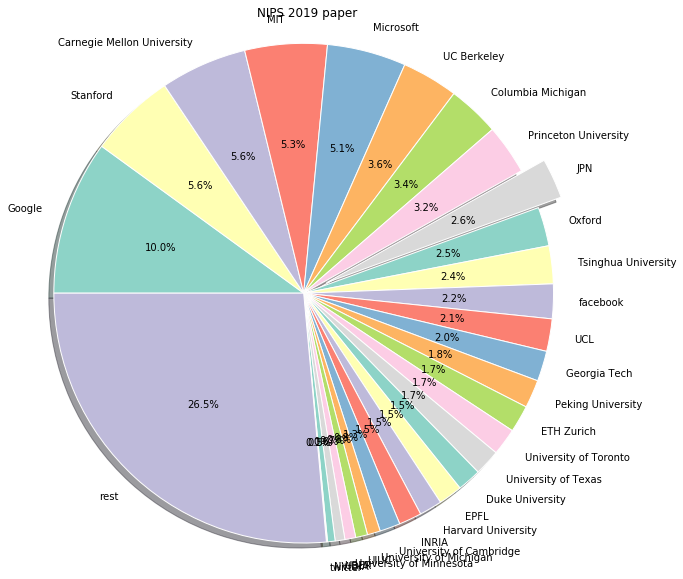

In [17]:
import matplotlib.pyplot as plt
import seaborn
from matplotlib import cm
cs=cm.Set3(np.arange(9))

plt.figure(figsize=(10,10))
 
# Data to plot
labels = [i[0] for i in nb_papers]
sizes = [i[1] for i in nb_papers]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = [0]*len(nb_papers)
for i,x in enumerate(nb_papers):
    if x[0]=='Google' or x[0]=='Google' or x[0]=='Carnegie Mellon University' or x[0]=='MIT' or x[0]=='Microsoft' or x[0]=='Stanford' or x[0]=='UCBerkeley':
        explode[i]=0.
    if x[0]=='JPN':
        explode[i]=0.1
 
plt.pie(
    sizes, 
    explode=explode, 
    labels=labels, 
    colors=cs,
    startangle=180,
    counterclock=False, 
    wedgeprops={'linewidth': 1, 'edgecolor':"white"},
    autopct='%1.1f%%',
    shadow=True
)

plt.axis('equal')
plt.title('NIPS 2019 paper')
plt.savefig(website+'.png')
plt.show()

In [32]:
institute_names = {
    "UCLA":['ucla'],
    "IBM":['ibm'],
    "Adobe":['adobe'],
    "Intel":['intel'],
    "Nvidia":['nvidia'],
    "OpenAI":['openai'],
    "Amazon":['amazon'],
    "Max Planck Institute":['planck'],
    "NTT":['ntt'],
    "NEC":['nec'],
    "TTIC":['toyota technological institute at chicago'],
    "Uber":['uber'],
    "Riken":['riken'],
    "Twitter":['twitter'],
    "Apple":['apple'],
    "JPN University":['tokyo','waseda','hokkaido','osaka','nankai', ' tokyo metropolitan university'],
}

count_paper(institute_names, institutes_in_paper)

[('Intel', 35),
 ('UCLA', 27),
 ('IBM', 21),
 ('Amazon', 20),
 ('JPN University', 14),
 ('Riken', 13),
 ('Max Planck Institute', 12),
 ('Uber', 9),
 ('Nvidia', 7),
 ('NEC', 6),
 ('Adobe', 4),
 ('NTT', 4),
 ('TTIC', 3),
 ('Apple', 2),
 ('OpenAI', 2),
 ('Twitter', 1)]